# 关于温度预报的数值预测模型的偏差校正
# Bias correction of numerical prediction model temperature forecast

## 1 导入数据

In [4]:
import pandas as pd
data = pd.read_csv('C:/Users/Desktop/Bias_correction_ucl.csv')
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [5]:
#属性
data.columns

#输入变量
#station：气象站号码
#Data：当前日期
'''原位观测值'''
#Present_Tmax：当前最高温（20-37.6）
#Present_Tmin：当前最低温（11.3-29.9）
'''LDAPS模型预测数据'''
#LDAPS_RHmin：LDAPS模型预测的次日最低相对湿度（19.8-98.5）%
#LDAPS_RHmax：LDAPS模型预测的次日最高相对湿度（58.9-100）%
#LDAPS_Tmax_lapse：LDAPS模型对次日最高气温的预测（17.6-38.5）
#LDAPS_Tmin_lapse：LDAPS模型对次日最低气温的预测（14.3-29.6）
#LDAPS_WS：LDAPS预测次日平均风速（2.9 to 21.9）
#LDAPS_LH：LDAPS预测次日平均潜热通量（13.6 to 213.4）
#LDAPS_CC1：LDAPS预测次日首六小时（0-5）时平均云量（0 to 0.97）
#CC2：第二个六小时（6-11）（0 to 0.97）
#CC3：第三个六小时（12-17）（0 to 0.98）
#CC4：第四个六小时（18-23）（0 to 0.97）
#LDAPS_PPT1：LDAPS预测次日首六小时（0-5）平均降水（0 to 23.7）
#PPT2：（6-11）
#PPT3：（12-17）
#PPT4：（18-23）
'''地理辅助变量'''
#lat：纬度（37.456-37.645）
#lon：经度（126.826-127.135）
#DEM：海拔（12.4-212.3）
#Slope：坡度（0.1-5.2）
#Solar radiation：日入射太阳辐射（4329.5 to 5992.9）

#输出变量
#Next_Tmax：次日最高温度（17.4-38.9）
#Next_Tmin：次日最低温度（11.3-29.8）

'地理辅助变量'

In [6]:
data.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [7]:
data['station'].isnull().sum()

2

In [8]:
#缺失值检测函数
def null_value_check(data):
    '''输入：pandas数组'''
    '''输出：每一列的缺失值情况'''
    for i in data.columns:
        print(i,'列缺失值个数为：',data[i].isnull().sum())

In [9]:
null_value_check(data)

station 列缺失值个数为： 2
Date 列缺失值个数为： 2
Present_Tmax 列缺失值个数为： 70
Present_Tmin 列缺失值个数为： 70
LDAPS_RHmin 列缺失值个数为： 75
LDAPS_RHmax 列缺失值个数为： 75
LDAPS_Tmax_lapse 列缺失值个数为： 75
LDAPS_Tmin_lapse 列缺失值个数为： 75
LDAPS_WS 列缺失值个数为： 75
LDAPS_LH 列缺失值个数为： 75
LDAPS_CC1 列缺失值个数为： 75
LDAPS_CC2 列缺失值个数为： 75
LDAPS_CC3 列缺失值个数为： 75
LDAPS_CC4 列缺失值个数为： 75
LDAPS_PPT1 列缺失值个数为： 75
LDAPS_PPT2 列缺失值个数为： 75
LDAPS_PPT3 列缺失值个数为： 75
LDAPS_PPT4 列缺失值个数为： 75
lat 列缺失值个数为： 0
lon 列缺失值个数为： 0
DEM 列缺失值个数为： 0
Slope 列缺失值个数为： 0
Solar radiation 列缺失值个数为： 0
Next_Tmax 列缺失值个数为： 27
Next_Tmin 列缺失值个数为： 27


对于缺失值的处理，我们常有以下方法：<br>
1.删除这些变量是缺失值(unknown)的行；<br>
2.如果预计该变量对于学习模型效果影响不大，可以对unknown值赋众数，这里认为变量都对学习模型有较大影响，不采取此法；<br>
3.可以使用数据完整的行作为训练集，以此来预测缺失值。<br><br>
分析：本研究适用于对LDAPS模型进行偏差校正的，如果用预测的方式填充缺失值，会失去数据真实性，在此我们直接把缺失值删去即可。

In [10]:
#删除缺失值
#axis=0: 删除包含缺失值的行
#how=‘any’ :只要有缺失值出现，就删除该行
#inplace=True在原数据上操作
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [11]:
data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


#### 第一列（station）和第二列（date）数据不需要，可以直接删掉处理。

In [12]:
data1 = data.drop(['station', 'Date'], axis=1) 

In [13]:
data1

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [14]:
null_value_check(data)

station 列缺失值个数为： 0
Date 列缺失值个数为： 0
Present_Tmax 列缺失值个数为： 0
Present_Tmin 列缺失值个数为： 0
LDAPS_RHmin 列缺失值个数为： 0
LDAPS_RHmax 列缺失值个数为： 0
LDAPS_Tmax_lapse 列缺失值个数为： 0
LDAPS_Tmin_lapse 列缺失值个数为： 0
LDAPS_WS 列缺失值个数为： 0
LDAPS_LH 列缺失值个数为： 0
LDAPS_CC1 列缺失值个数为： 0
LDAPS_CC2 列缺失值个数为： 0
LDAPS_CC3 列缺失值个数为： 0
LDAPS_CC4 列缺失值个数为： 0
LDAPS_PPT1 列缺失值个数为： 0
LDAPS_PPT2 列缺失值个数为： 0
LDAPS_PPT3 列缺失值个数为： 0
LDAPS_PPT4 列缺失值个数为： 0
lat 列缺失值个数为： 0
lon 列缺失值个数为： 0
DEM 列缺失值个数为： 0
Slope 列缺失值个数为： 0
Solar radiation 列缺失值个数为： 0
Next_Tmax 列缺失值个数为： 0
Next_Tmin 列缺失值个数为： 0


In [26]:
data1_Tmax = data1.iloc[:,0:21]

In [28]:
data1['Next_Tmax']

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 7588, dtype: float64

## 0.LDAPS模型的预测评估

In [20]:
import numpy as np
RMSE(data1['LDAPS_Tmax_lapse'],data1['Next_Tmax']),RMSE(data1['LDAPS_Tmin_lapse'],data1['Next_Tmin'])

(1.8502362971862867, 1.3039642827582851)

In [18]:
import math
#R方的计算
def R2(X, Y):
    r2=1-((1/len(X)) * np.sum((X - Y)**2))/np.var(X)
    return r2

In [21]:
R2(np.array(data1['LDAPS_Tmax_lapse']),np.array(data1['Next_Tmax'])),R2(np.array(data1['LDAPS_Tmin_lapse']),np.array(data1['Next_Tmin']))

(0.6048293214199242, 0.6901152634593297)

In [38]:
#对LDAPS模型的偏差校正做出贡献大小
#输出值为正数：有贡献，数值越大贡献越大。负值无贡献。
#输入：偏差校正模型计算得到的MSE，为array数组形式（最高温，最低温）
def LDAPS_correction(rmse):
    LDAPS_RMSE = np.array([1.8502362971862867, 1.3039642827582851])
    return sum((LDAPS_RMSE-rmse)/LDAPS_RMSE),(LDAPS_RMSE-rmse)/LDAPS_RMSE

##  1.线性回归

In [16]:
def RMSE(y, t):
    return ((1/len(y)) * np.sum((y - t)**2))**0.5

In [23]:
import matplotlib.pyplot as plt

最高温预测模型在训练集上的准确率 0.5705675438069225
最低温预测模型在训练集上的准确率 0.8374298754899508
----------------------------------------------------
最高温预测模型在测试集上的准确率 0.5922618527837255
最低温预测模型在测试集上的准确率 0.8162918967088724


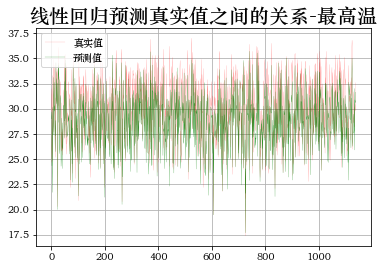

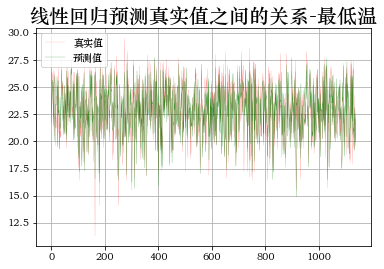

LR的最高温均根方误差： 1.978169314434586
LR的最低温均根方误差： 1.0632568429441251
LR的最高温R2： 0.46999806225733953
LR的最低温R2： 0.7761941764826248


In [24]:
#LinearRegression
import numpy as np # 快速操作结构数组的工具
from sklearn.linear_model import LinearRegression

'''归一化处理：克服量纲的影响'''
#arr_mean = np.mean(data1) #求均值
#arr_std = np.std(data1,ddof=1) #求标准差
#newdata=(data1-arr_mean )/arr_std 
newdata = data1.copy()

'''拆分预测：最高温和最低温'''
new_data1 = newdata.iloc[:,0:21]
data1_Tmax_X = new_data1.drop(['LDAPS_Tmin_lapse','Present_Tmin'], axis=1) 
data1_Tmin_X = new_data1.drop(['LDAPS_Tmax_lapse','Present_Tmax'], axis=1) 

data1_Tmax_target = newdata['Next_Tmax']
data1_Tmin_target = newdata['Next_Tmin']

'''拆分数据集为训练集和测试集（85%训练集+15%测试集）'''
from sklearn.model_selection import train_test_split
X_train_max,X_test_max,y_train_max,y_test_max = train_test_split(data1_Tmax_X,data1_Tmax_target,test_size=0.15,random_state=33)
X_train_min,X_test_min,y_train_min,y_test_min = train_test_split(data1_Tmin_X,data1_Tmin_target,test_size=0.15,random_state=44)

'''构建模型'''
LR1 = LinearRegression()
LR2 = LinearRegression()

'''训练模型'''
LR1.fit(X_train_max,y_train_max)
LR1.fit(X_train_min,y_train_min)

'''模型评估'''
#在训练集上的准确率
print("最高温预测模型在训练集上的准确率",LR1.score(X_train_max,y_train_max))
print("最低温预测模型在训练集上的准确率",LR1.score(X_train_min,y_train_min))

print("----------------------------------------------------")

#在测试集上的准确率
print("最高温预测模型在测试集上的准确率",LR1.score(X_test_max,y_test_max))
print("最低温预测模型在测试集上的准确率",LR1.score(X_test_min,y_test_min))

'''预测值和真实值的比较'''

plt.rcParams['font.sans-serif'] = ['STZhongsong']    # 指定默认字体：解决plot不能显示中文问题
plt.rcParams['axes.unicode_minus'] = False           # 解决保存图像是负号'-'显示为方块的问题
y_predict_max = LR1.predict(X_test_max)
t=np.arange(len(X_test_max))
plt.figure(facecolor='w')#建一个画布，facecolor是背景色
plt.plot(t, y_test_max, 'r-', linewidth=0.1, label='真实值')
plt.plot(t, y_predict_max, 'g-', linewidth=0.2, label='预测值')
plt.legend(loc = 'upper left')#显示图例，设置图例的位置
plt.title("线性回归预测真实值之间的关系-最高温", fontsize=20)
plt.grid(b=True)#加网格
plt.show()

y_predict_min = LR1.predict(X_test_min)
t=np.arange(len(X_test_min))
plt.figure(facecolor='w')#建一个画布，facecolor是背景色
plt.plot(t, y_test_min, 'r-', linewidth=0.1, label='真实值')
plt.plot(t, y_predict_min, 'g-', linewidth=0.2, label='预测值')
plt.legend(loc = 'upper left')#显示图例，设置图例的位置
plt.title("线性回归预测真实值之间的关系-最低温", fontsize=20)
plt.grid(b=True)#加网格
plt.show()

'''计算MSE和R方'''
print('LR的最高温均根方误差：',RMSE(y_predict_max,y_test_max))
print('LR的最低温均根方误差：',RMSE(y_predict_min,y_test_min))

print('LR的最高温R2：',R2(np.array(y_predict_max),np.array(y_test_max)))
print('LR的最低温R2：',R2(np.array(y_predict_min),np.array(y_test_min)))

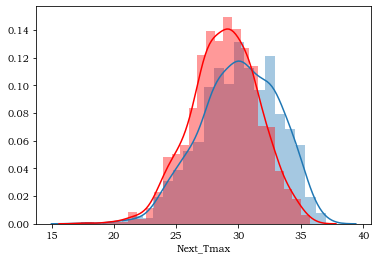

In [26]:
import seaborn as sns
sns.distplot(y_test_max)
sns.distplot(y_predict_max, color="red")

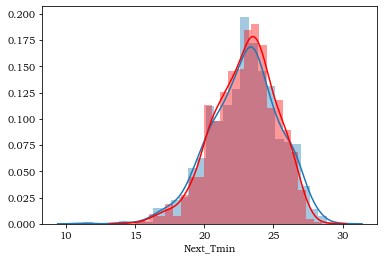

In [27]:
sns.distplot(y_test_min)
sns.distplot(y_predict_min, color="red")

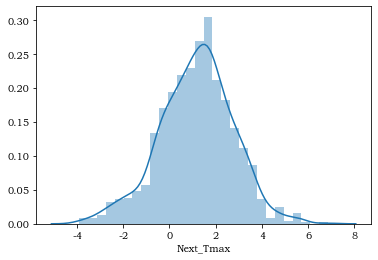

In [28]:
sns.distplot(y_test_max-y_predict_max)

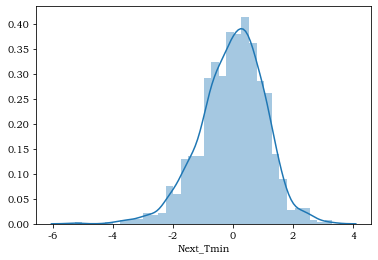

In [29]:
sns.distplot(y_test_min-y_predict_min)

In [39]:
LR_rmse = np.array([1.978169314434586,1.0632568429441251])
LDAPS_correction(LR_rmse)

(0.11545250051042118, array([-0.06914415,  0.18459665]))

## 2.随机森林

In [30]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

'''
随机森林回归、极端随机森林回归
通常集成模型能够取得非常好的表现
'''

#这里的数据还用的是刚才线性回归分割好的训练集和测试集
#X_train_max,X_test_max,y_train_max,y_test_max
#X_train_min,X_test_min,y_train_min,y_test_min

# 4 三种集成回归模型进行训练和预测
# 随机森林回归
rfr1 = RandomForestRegressor()
rfr2 = RandomForestRegressor()
# 训练
rfr1.fit(X_train_max, y_train_max)
rfr2.fit(X_train_min, y_train_min)
# 预测 保存预测结果
rfr1_y_predict_max = rfr1.predict(X_test_max)
rfr2_y_predict_min = rfr2.predict(X_test_min)

# 极端随机森林回归
etr1 = ExtraTreesRegressor()
etr2 = ExtraTreesRegressor()
# 训练
etr1.fit(X_train_max, y_train_max)
etr2.fit(X_train_min, y_train_min)
# 预测 保存预测结果
etr1_y_predict_max = etr1.predict(X_test_max)
etr2_y_predict_min = etr1.predict(X_test_min)


# 5 模型评估

print("------------------最高温----------------------------------")

# 随机森林回归模型评估
print("随机森林回归的默认评估值为：", rfr1.score(X_test_max, y_test_max))
print("随机森林回归的R_squared值为：", R2(np.array(y_test_max), rfr1_y_predict_max))
print("随机森林回归的均方根误差为:", RMSE(rfr1_y_predict_max,y_test_max))

print("----------------------------------------------------")


# 极端随机森林回归模型评估
print("极端随机森林回归的默认评估值为：", etr1.score(X_test_max, y_test_max))
print("极端随机森林回归的R_squared值为：", R2(np.array(y_test_max), etr1_y_predict_max))
print("极端随机森林回归的均方根误差为:", RMSE(etr1_y_predict_max,y_test_max))

print("------------------最低温----------------------------------")


# 随机森林回归模型评估
print("随机森林回归的默认评估值为：", rfr2.score(X_test_min, y_test_min))
print("随机森林回归的R_squared值为：", R2(np.array(y_test_min), rfr2_y_predict_min))
print("随机森林回归的均方根误差为:", RMSE(rfr2_y_predict_min,y_test_min))

print("----------------------------------------------------")


# 极端随机森林回归模型评估
print("极端随机森林回归的默认评估值为：", etr2.score(X_test_min, y_test_min))
print("极端随机森林回归的R_squared值为：", R2(np.array(y_test_min), etr2_y_predict_min))
print("极端随机森林回归的均方根误差为:", RMSE(etr2_y_predict_min,y_test_min))

D:\University\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\University\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\University\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\University\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------最高温----------------------------------
随机森林回归的默认评估值为： 0.8855752255275056
随机森林回归的R_squared值为： 0.8855752255275056
随机森林回归的均方根误差为: 1.0479313205920449
----------------------------------------------------
极端随机森林回归的默认评估值为： 0.909988538134836
极端随机森林回归的R_squared值为： 0.909988538134836
极端随机森林回归的均方根误差为: 0.9294407203677852
------------------最低温----------------------------------
随机森林回归的默认评估值为： 0.8848297654933537
随机森林回归的R_squared值为： 0.8848297654933537
随机森林回归的均方根误差为: 0.8418682973163554
----------------------------------------------------
极端随机森林回归的默认评估值为： 0.8913061325236367
极端随机森林回归的R_squared值为： -0.32033332054285024
极端随机森林回归的均方根误差为: 2.8504657136859293


In [40]:
RF_rmse = np.array([1.0479313205920449,0.8418682973163554])
LDAPS_correction(RF_rmse)

(0.7880007734284817, array([0.43362298, 0.35437779]))

In [32]:
ET_rmse = np.array([0.9294407203677852,2.8504657136859293])
LDAPS_correction(ET_rmse)

-0.6883360670430252

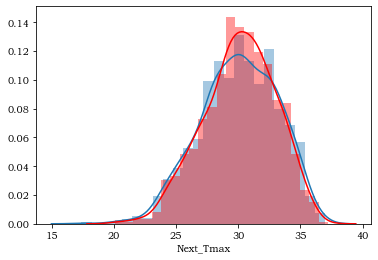

In [33]:
sns.distplot(y_test_max)
sns.distplot(rfr1_y_predict_max, color="red")

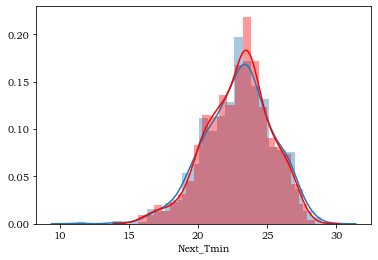

In [34]:
sns.distplot(y_test_min)
sns.distplot(rfr2_y_predict_min, color="red")

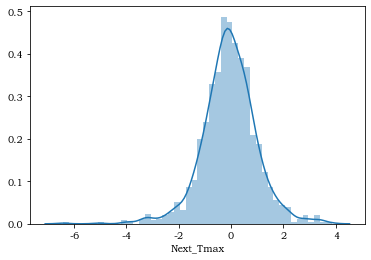

In [35]:
sns.distplot(y_test_max-rfr1_y_predict_max)

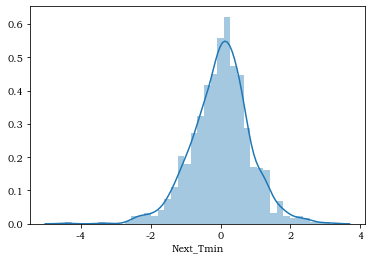

In [36]:
sns.distplot(y_test_min-rfr2_y_predict_min)

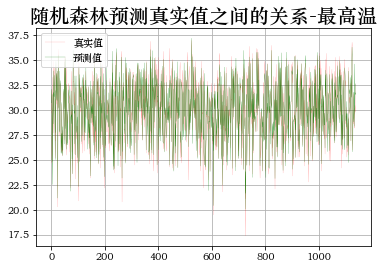

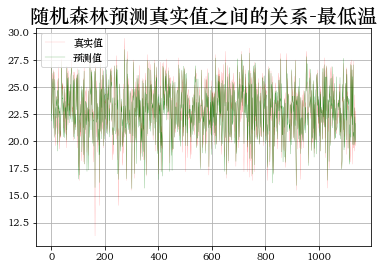

In [37]:
'''预测值和真实值的比较'''
plt.rcParams['font.sans-serif'] = ['STZhongsong']    # 指定默认字体：解决plot不能显示中文问题
plt.rcParams['axes.unicode_minus'] = False           # 解决保存图像是负号'-'显示为方块的问题

t=np.arange(len(X_test_max))
plt.figure(facecolor='w')#建一个画布，facecolor是背景色
plt.plot(t, y_test_max, 'r-', linewidth=0.1, label='真实值')
plt.plot(t, rfr1_y_predict_max, 'g-', linewidth=0.2, label='预测值')
plt.legend(loc = 'upper left')#显示图例，设置图例的位置
plt.title("随机森林预测真实值之间的关系-最高温", fontsize=20)
plt.grid(b=True)#加网格
plt.show()


t=np.arange(len(X_test_min))
plt.figure(facecolor='w')#建一个画布，facecolor是背景色
plt.plot(t, y_test_min, 'r-', linewidth=0.1, label='真实值')
plt.plot(t, rfr2_y_predict_min, 'g-', linewidth=0.2, label='预测值')
plt.legend(loc = 'upper left')#显示图例，设置图例的位置
plt.title("随机森林预测真实值之间的关系-最低温", fontsize=20)
plt.grid(b=True)#加网格
plt.show()